# Signals and Systems for Dummies, Chapter 12

In [1]:
from pathlib import Path
import sys

if (root := str(Path().resolve().parent.parent / "python")) not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from rfdsppy import continuous_time as conttime, plotting, discrete_time, tonegen
# import mplcursors

from importlib import reload

reload(conttime)
reload(plotting)
reload(discrete_time)
reload(tonegen)

# %matplotlib ipympl
%matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


## Circular shift

Text(0.5, 0, 'DT Frequency (Radians/Sample)')

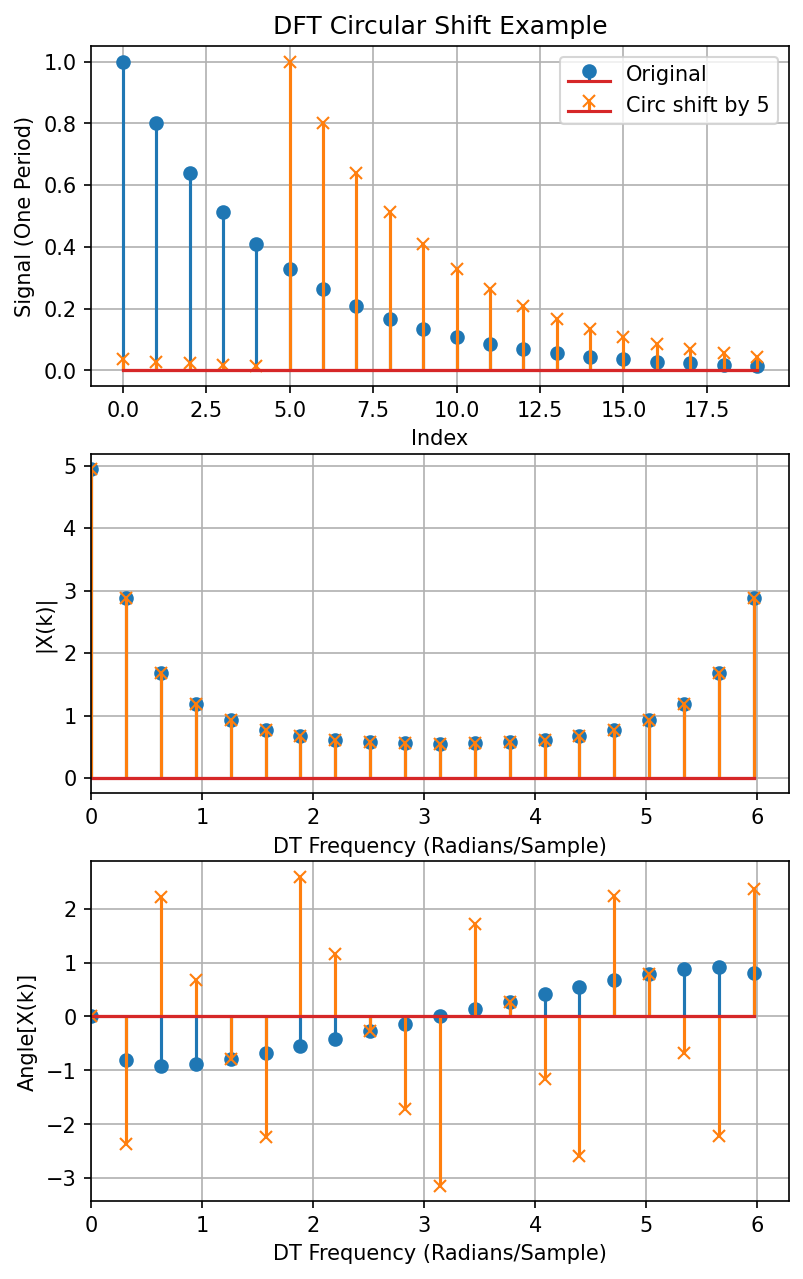

In [30]:
a = 0.8
shift = 5

n = np.arange(20)
x = a**n
x_circshift = np.roll(x, shift)

x_fft = fft.fft(x)
x_circshift_fft = fft.fft(x_circshift)
w = 2*np.pi/len(x_fft)*np.arange(len(x_fft))

fig, axs = plt.subplots(nrows=3, dpi=150, figsize=(6, 10))
axs[0].stem(n, x, linefmt='C0', label="Original")
axs[0].stem(n, x_circshift, linefmt='C1', markerfmt='x', label=f"Circ shift by {shift}")
axs[0].grid()
axs[0].legend()
axs[0].set_ylabel("Signal (One Period)")
axs[0].set_xlabel("Index")
axs[0].set_title("DFT Circular Shift Example")
axs[1].stem(w, np.abs(x_fft), linefmt='C0', )
axs[1].stem(w, np.abs(x_circshift_fft), linefmt='C1', markerfmt='x')
axs[1].grid()
axs[1].set_xlim(left=0, right=2*np.pi)
axs[1].set_ylabel("|X(k)|")
axs[1].set_xlabel("DT Frequency (Radians/Sample)")
axs[2].stem(w, np.angle(x_fft), linefmt='C0')
axs[2].stem(w, np.angle(x_circshift_fft), linefmt='C1', markerfmt='x')
axs[2].grid()
axs[2].set_xlim(left=0, right=2*np.pi)
axs[2].set_ylabel("Angle[X(k)]")
axs[2].set_xlabel("DT Frequency (Radians/Sample)")

## Circular convolution

In [93]:
def convolve_circ(x: np.ndarray, h: np.ndarray):
    assert x.ndim == 1, "x must be 1D"
    assert h.ndim == 1, "h must be 1D"
    assert x.size == h.size, "Input arrays must be the same length"

    y = np.zeros_like(x)
    for idx in range(y.size):
        y[idx] = np.dot(x, np.roll(h[::-1], idx+1))
    
    return y

Text(0.5, 0, 'DT Frequency (Radians/Sample)')

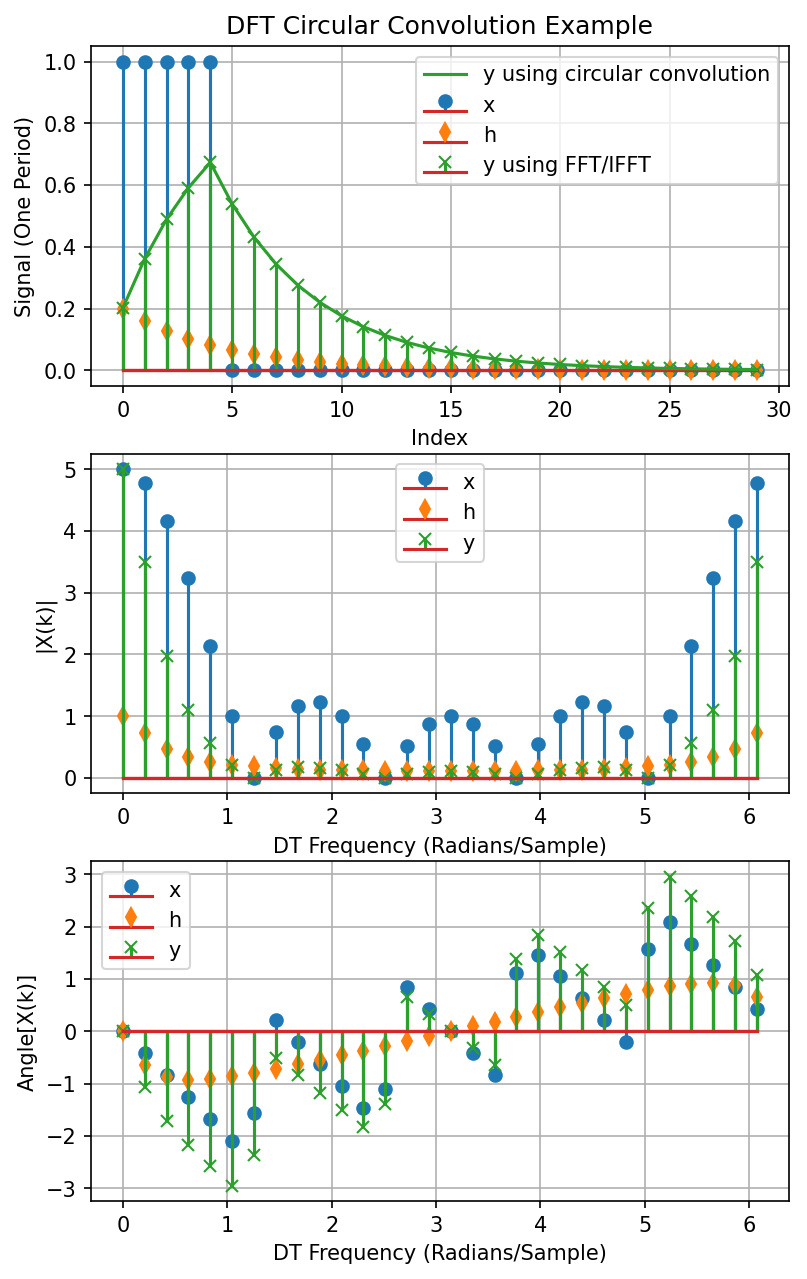

In [100]:
a = 0.8
M = 5
N = 30

n = np.arange(N)
h = (a**n).astype("float")
h = h/h.sum()
x = np.zeros_like(n, dtype="float")
x[:M] = 1
# x[0] = 1

x_fft = fft.fft(x)
h_fft = fft.fft(h)
w = 2*np.pi/len(x_fft)*np.arange(len(x_fft))

y_fft = x_fft*h_fft
y = fft.ifft(y_fft).real
y2 = convolve_circ(x, h)

fig, axs = plt.subplots(nrows=3, dpi=150, figsize=(6, 10))
axs[0].stem(n, x, linefmt='C0', label="x")
axs[0].stem(n, h, linefmt='C1', label="h", markerfmt='d')
axs[0].stem(n, y, linefmt='C2', label="y using FFT/IFFT", markerfmt='x')
# axs[0].stem(n, y2, linefmt='C3', label="y_circ_conv", markerfmt='-')
axs[0].plot(n, y2, label="y using circular convolution", color="C2")
axs[0].grid()
axs[0].legend()
axs[0].set_ylabel("Signal (One Period)")
axs[0].set_xlabel("Index")
axs[0].set_title("DFT Circular Convolution Example")
axs[1].stem(w, np.abs(x_fft), linefmt='C0', label="x")
axs[1].stem(w, np.abs(h_fft), linefmt='C1', label="h", markerfmt='d')
axs[1].stem(w, np.abs(y_fft), linefmt='C2', label="y", markerfmt='x')
axs[1].grid()
axs[1].legend()
axs[1].set_ylabel("|X(k)|")
axs[1].set_xlabel("DT Frequency (Radians/Sample)")
axs[2].stem(w, np.angle(x_fft), linefmt='C0', label="x")
axs[2].stem(w, np.angle(h_fft), linefmt='C1', label="h", markerfmt='d')
axs[2].stem(w, np.angle(y_fft), linefmt='C2', label="y", markerfmt='x')
axs[2].grid()
axs[2].legend()
axs[2].set_ylabel("Angle[X(k)]")
axs[2].set_xlabel("DT Frequency (Radians/Sample)")